In [1]:
import pycaret
pycaret.__version__

'3.0.0.rc4'

# Dataset

In [2]:
from pycaret.datasets import get_data
data = get_data('electrical_grid')

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


# Init Setup

In [3]:
from pycaret.classification import *
s = setup(data, target = 'stabf', session_id = 123)

,Description,Value
0,Session id,123
1,Target,stabf
2,Target type,Binary
3,Target mapping,"stable: 0, unstable: 1"
4,Original data shape,"(10000, 13)"
5,Transformed data shape,"(10000, 13)"
6,Transformed train set shape,"(6999, 13)"
7,Transformed test set shape,"(3001, 13)"
8,Numeric features,12
9,Preprocess,True


# Compare baseline models

In [4]:
%%time
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9486,0.9911,0.9693,0.9510,0.9601,0.8878,0.8882,9.9200
xgboost,Extreme Gradient Boosting,0.9433,0.9888,0.9651,0.9471,0.9560,0.8763,0.8767,1.4230
lightgbm,Light Gradient Boosting Machine,0.9371,0.9868,0.9604,0.9423,0.9512,0.8629,0.8634,0.5000
et,Extra Trees Classifier,0.9217,0.9821,0.9733,0.9103,0.9407,0.8258,0.8301,0.5600
rf,Random Forest Classifier,0.9196,0.9778,0.9514,0.9248,0.9379,0.8239,0.8248,0.5090
gbc,Gradient Boosting Classifier,0.9187,0.9771,0.9599,0.9167,0.9378,0.8207,0.8227,0.9810
qda,Quadratic Discriminant Analysis,0.8767,0.9512,0.9131,0.8963,0.9042,0.7311,0.7328,0.1000
ada,Ada Boost Classifier,0.8498,0.9309,0.9035,0.8669,0.8848,0.6695,0.6709,0.3420
dt,Decision Tree Classifier,0.8421,0.8303,0.8732,0.8786,0.8759,0.6590,0.6591,0.2970
nb,Naive Bayes,0.8344,0.9176,0.9259,0.8333,0.8771,0.6255,0.6339,0.1570


CPU times: total: 26.9 s
Wall time: 3min 6s


# Tune Hyperparameters

In [5]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8414,0.8295,0.8725,0.8784,0.8754,0.6574,0.6574
1,0.8243,0.8110,0.8591,0.8649,0.8620,0.6203,0.6203
2,0.8343,0.8188,0.8747,0.8670,0.8708,0.6398,0.6398
3,0.8357,0.8225,0.8702,0.8722,0.8712,0.6444,0.6444
4,0.8429,0.8332,0.8680,0.8838,0.8758,0.6619,0.6621
5,0.8457,0.8349,0.8744,0.8824,0.8784,0.6675,0.6675
6,0.8557,0.8469,0.8789,0.8929,0.8859,0.6898,0.6900
7,0.8600,0.8444,0.9013,0.8816,0.8914,0.6946,0.6950
8,0.8471,0.8377,0.8722,0.8861,0.8791,0.6714,0.6715


In [6]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8229,0.8731,0.8814,0.8473,0.8640,0.6102,0.6112
1,0.8286,0.8878,0.9128,0.8344,0.8718,0.6147,0.6204
2,0.8300,0.8850,0.9038,0.8417,0.8716,0.6210,0.6244
3,0.8271,0.8814,0.9239,0.8260,0.8722,0.6077,0.6169
4,0.8186,0.8597,0.9038,0.8279,0.8642,0.5926,0.5978
5,0.8386,0.8911,0.9103,0.8476,0.8778,0.6408,0.6444
6,0.8471,0.8996,0.9238,0.8495,0.8851,0.6581,0.6633
7,0.8400,0.9030,0.9170,0.8450,0.8796,0.6425,0.6472
8,0.8314,0.8686,0.9193,0.8333,0.8742,0.6206,0.6275


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [7]:
tuned_dt = tune_model(dt, n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8414,0.8786,0.8680,0.8818,0.8749,0.6585,0.6587
1,0.8386,0.8713,0.8613,0.8830,0.8720,0.6536,0.6539
2,0.8500,0.8802,0.8881,0.8783,0.8832,0.6736,0.6737
3,0.8529,0.8999,0.8747,0.8927,0.8836,0.6837,0.6839
4,0.8443,0.8866,0.8635,0.8894,0.8763,0.6664,0.6669
5,0.8771,0.9044,0.9103,0.8982,0.9042,0.7329,0.7331
6,0.8600,0.9037,0.8969,0.8850,0.8909,0.6957,0.6958
7,0.8757,0.9007,0.9081,0.8980,0.9030,0.7301,0.7302
8,0.8486,0.8745,0.8700,0.8899,0.8798,0.6753,0.6756


Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [8]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0, min_samples_leaf=5,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [9]:
import numpy as np
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [10]:
dt_custom_grid = {'max_depth' : np.arange(1,50)}

In [11]:
tuned_dt_with_cg = tune_model(dt, custom_grid = dt_custom_grid)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8414,0.8295,0.8725,0.8784,0.8754,0.6574,0.6574
1,0.8243,0.8110,0.8591,0.8649,0.8620,0.6203,0.6203
2,0.8343,0.8188,0.8747,0.8670,0.8708,0.6398,0.6398
3,0.8357,0.8225,0.8702,0.8722,0.8712,0.6444,0.6444
4,0.8429,0.8332,0.8680,0.8838,0.8758,0.6619,0.6621
5,0.8457,0.8349,0.8744,0.8824,0.8784,0.6675,0.6675
6,0.8557,0.8469,0.8789,0.8929,0.8859,0.6898,0.6900
7,0.8600,0.8444,0.9013,0.8816,0.8914,0.6946,0.6950
8,0.8471,0.8377,0.8722,0.8861,0.8791,0.6714,0.6715


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Model Ensembling

In [12]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8414,0.8295,0.8725,0.8784,0.8754,0.6574,0.6574
1,0.8243,0.8110,0.8591,0.8649,0.8620,0.6203,0.6203
2,0.8343,0.8188,0.8747,0.8670,0.8708,0.6398,0.6398
3,0.8357,0.8225,0.8702,0.8722,0.8712,0.6444,0.6444
4,0.8429,0.8332,0.8680,0.8838,0.8758,0.6619,0.6621
5,0.8457,0.8349,0.8744,0.8824,0.8784,0.6675,0.6675
6,0.8557,0.8469,0.8789,0.8929,0.8859,0.6898,0.6900
7,0.8600,0.8444,0.9013,0.8816,0.8914,0.6946,0.6950
8,0.8471,0.8377,0.8722,0.8861,0.8791,0.6714,0.6715


In [13]:
bagged_dt = ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8871,0.9495,0.9038,0.9182,0.9109,0.7570,0.7571
1,0.8843,0.9558,0.8881,0.9276,0.9074,0.7533,0.7546
2,0.8986,0.9595,0.9128,0.9273,0.9200,0.7816,0.7818
3,0.8886,0.9589,0.9038,0.9203,0.9120,0.7602,0.7605
4,0.8957,0.9602,0.9105,0.9250,0.9177,0.7754,0.7756
5,0.9100,0.9632,0.9327,0.9265,0.9296,0.8049,0.8049
6,0.8943,0.9581,0.9081,0.9247,0.9163,0.7729,0.7731
7,0.9229,0.9687,0.9484,0.9317,0.9400,0.8320,0.8323
8,0.8814,0.9530,0.8857,0.9251,0.9049,0.7476,0.7489


In [14]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8386,0.8273,0.8680,0.8778,0.8729,0.6518,0.6519
1,0.8200,0.8076,0.8523,0.8639,0.8581,0.6120,0.6121
2,0.8371,0.8236,0.8725,0.8725,0.8725,0.6472,0.6472
3,0.8400,0.8284,0.8702,0.8781,0.8742,0.6546,0.6546
4,0.8400,0.8310,0.8635,0.8833,0.8733,0.6563,0.6566
5,0.8443,0.8337,0.8722,0.8821,0.8771,0.6647,0.6647
6,0.8457,0.8382,0.8655,0.8894,0.8773,0.6697,0.6701
7,0.8586,0.8424,0.9013,0.8796,0.8904,0.6913,0.6917
8,0.8414,0.8306,0.8700,0.8798,0.8749,0.6585,0.6586


In [15]:
dt = create_model('dt', verbose = False)
lr = create_model('lr', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)

In [16]:
blender = blend_models([dt,lr,lightgbm])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8871,0.9638,0.9105,0.9126,0.9115,0.7557,0.7557
1,0.8771,0.9560,0.9172,0.8932,0.9051,0.7311,0.7316
2,0.8929,0.9611,0.9284,0.9061,0.9171,0.7657,0.7661
3,0.9057,0.9640,0.9374,0.9168,0.9270,0.7940,0.7944
4,0.8900,0.9664,0.9172,0.9111,0.9142,0.7611,0.7611
5,0.9057,0.9713,0.9327,0.9204,0.9265,0.7950,0.7952
6,0.8943,0.9673,0.9327,0.9043,0.9183,0.7686,0.7694
7,0.9114,0.9742,0.9507,0.9138,0.9319,0.8055,0.8068
8,0.8771,0.9576,0.9126,0.8965,0.9044,0.7325,0.7327


In [17]:
stacker = stack_models([dt,lr,lightgbm])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9386,0.9877,0.9553,0.9489,0.9521,0.8666,0.8666
1,0.9257,0.9825,0.9418,0.9418,0.9418,0.8391,0.8391
2,0.9271,0.9843,0.9463,0.9400,0.9431,0.8418,0.8418
3,0.9514,0.9841,0.9620,0.9620,0.9620,0.8948,0.8948
4,0.9414,0.9865,0.9597,0.9491,0.9544,0.8726,0.8727
5,0.9500,0.9900,0.9709,0.9516,0.9612,0.8910,0.8914
6,0.9314,0.9840,0.9596,0.9345,0.9469,0.8502,0.8508
7,0.9429,0.9908,0.9731,0.9394,0.9559,0.8747,0.8758
8,0.9229,0.9792,0.9439,0.9356,0.9397,0.8326,0.8327


# Model Analysis and Visualization

In [18]:
best

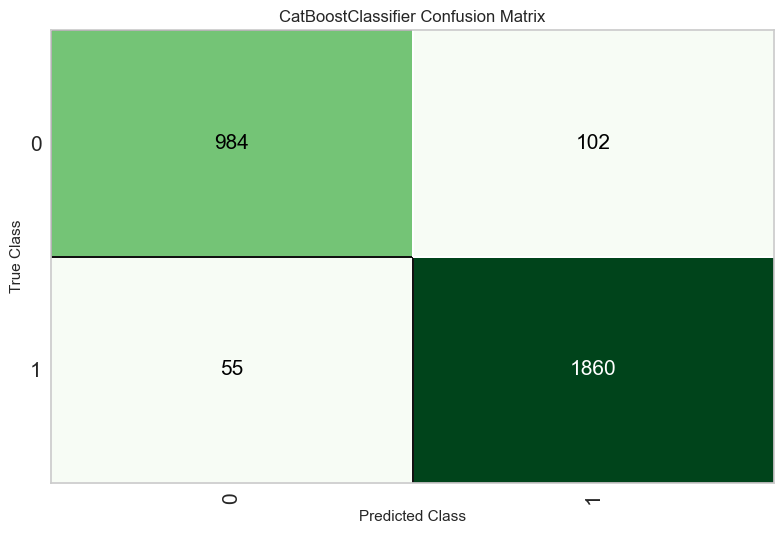

In [19]:
plot_model(best, plot = 'confusion_matrix')

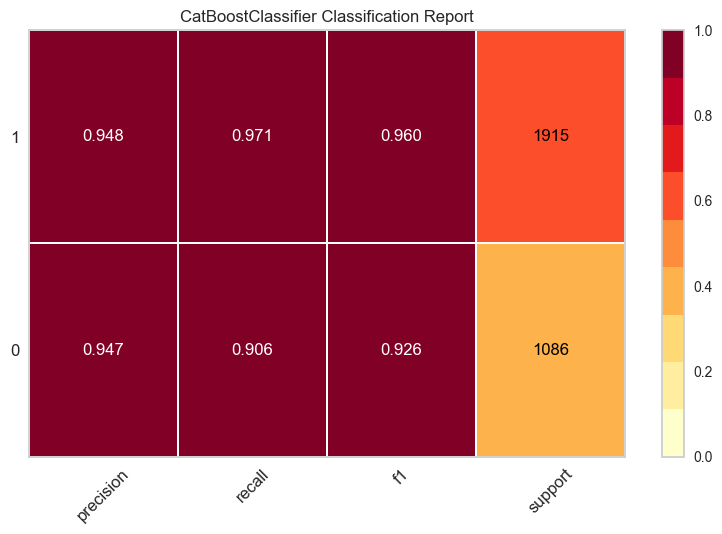

In [20]:
plot_model(best, plot = 'class_report')

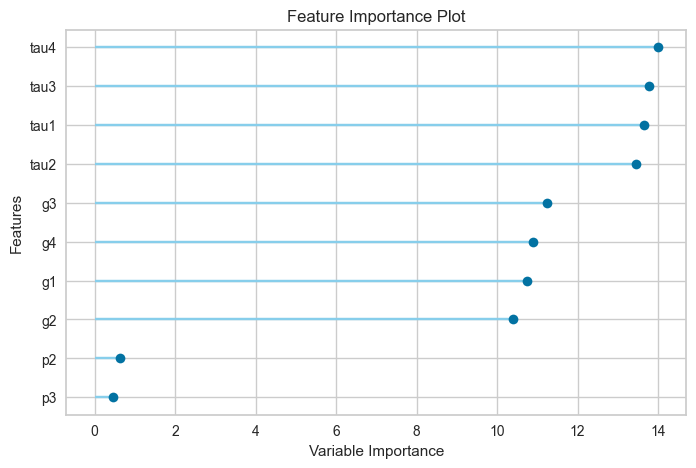

In [21]:
plot_model(best, plot = 'feature')

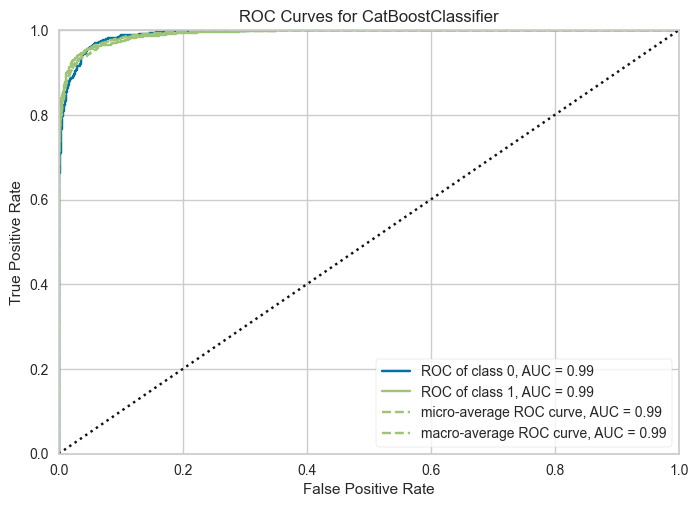

In [22]:
plot_model(best, plot = 'auc')

In [23]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Performance on test set

In [24]:
predict_model(best);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9477,0.9919,0,0,0,0.8857,0.8862


In [25]:
new_data = data.copy()
new_data.drop('stabf', inplace=True, axis = 1)
new_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [26]:
predictions = predict_model(best, new_data)
predictions.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,prediction_label,prediction_score
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable,0.9995
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable,0.6866
2,8.971707,8.848429,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable,0.8480
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable,0.9402
4,3.134112,7.608772,4.943759,9.857574,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820924,unstable,0.9998


# Saving / Loading Pipeline

In [27]:
save_model(best, 'electric_grid_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\owner\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tau1', 'tau2', 'tau3', 'tau4',
                                              'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
                                              'g3', 'g4'],
                                     transformer=SimpleImputer(add_indic...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value='constant',
                                          

In [28]:
electric_grid_pipeline = load_model('electric_grid_pipeline')

Transformation Pipeline and Model Successfully Loaded


In [29]:
electric_grid_pipeline

Pipeline(memory=Memory(location=C:\Users\owner\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['tau1', 'tau2', 'tau3', 'tau4',
                                             'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
                                             'g3', 'g4'],
                                    transformer=SimpleImputer(add_indic...
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value='constant',
                                                              missing_values=nan,
                                                              strategy='constant',
                                                              verbose='deprecated'))),
                ('low_variance',
                 TransformerWrapper(exclude=[], include=None,
                                    transformer=VarianceThreshold(threshold=0))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x000002392C504280>)],
         verbose=False)